In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
from collections import Counter
import random

In [16]:
#Definición de clases para la simulación
#Se definen tres clases: 'people', 'cities','step'
SEEKING_MACHINE = 1
TREATED = 2
#Definición de la clase 'person'. Tiene como atributos el origen, los lugares visitados, el estado, el destino en ese momento
#y el tiempo restante del viaje. 
class Person:
    def __init__(self, origin, destination,timeD):
        self.origin = origin
        self.visited = [origin]
        self.status = SEEKING_MACHINE
        self.destination = destination
        self.tripRemaining = np.nan # replace with value from table
    

LIMIT = 10
FREE = 1
OCCUPIED = 2
#Definición de la clase 'Machine'. Puede estar ocupada o libre. Tiene el registro de los pacientes atentidos. 
class Machine:
    def __init__(self):
        self.state = FREE
        self.treated = []
#Definición de la clase 'City'. Tiene como atributos el nombre, si tiene máquina y su identificación y la población. Éste último
#valor está dado por la incidencia de cáncer por departamento. 
class City:
    def __init__(self, name,population,machine=None):
        self.name = name
        self.machine = machine
        self.population = population

class World():
    #función para incializar las clases
    def __init__(self, delta):
        sel.delta=delta
        #self.people = people
        #self.cities = cities
        #self.step = step
    #array para guardar el número de pacientes que lograron ser atendidos con la iteración     
    treated_people=[]
    #función que la actualización de estados en cada paso de la simulación 
    #Se actualiza: el tiempo restante para llegar a la ciudad de destino, se cambia el estado de ciudades visitadas de ser
    #necesario, se actualizan el número de pacientes atentidos por máquina, se asigna un nuevo origen a la persona de ser 
    #necesario. 
    def step(self, delta):
        for person in self.people:
            if person.tripRemaining > 0: 
                person.status = SEEKING_MACHINE
                person.tripRemaining = - delta
            else:
                cityD = person.destination
                person.visited.append(cityD)

                if cityD.machine is not None: #si llega al destino se aplica este condicional
                    if len(cityD.machine.treated) < LIMIT:
                        person.status = TREATED #cambia el estado si hay cupos en la máquina
                        cityD.machine.treated.append(person)
                        treated.append(person)#revisar para qué sirve 
                        if len(cityD.machine.treated) == LIMIT: #condicional para decidir qué pasa cuando se llena la máquina
                            cityD.machine.status = OCCUPIED
                            new_ori=cityD.name
                            person.origin = new_ori
                            tablaf_newD = tablasCorr(new_ori)
                            time_d=min(tablaf_newD)
                            n_ciudad_destino=tablaf_newD[tablaf_newD==time_d].index.values[0].split('s ')[1]    
                            
                            
                else:
                    #ir para otro lado si la ciudad no tiene máquinas 
                    cityD.machine.status = OCCUPIED
                    new_ori=cityD.name
                    person.origin = new_ori
                    tablaf_newD = tablasCorr(new_ori)
                    time_d=min(tablaf_newD)
                    n_ciudad_destino=tablaf_newD[tablaf_newD==time_d].index.values[0].split('s ')[1]    
                            
            
        
            
    


    

In [12]:
arch2 = pd.read_csv('./BD_Simulacion_SinBAVc.csv')
arch2['people_count_round']=round(arch2['people_count'])
arch2.head()

,Departamento,population_mm,population_ratio,latitud,longitud,Hours ARAUCA,Distance ARAUCA,Hours ATLANTICO,Distance ATLANTICO,Hours BOLIVAR,...,TAE melanoma. hombres,TAE cáncer colorrectal. mujeres,TAE linfoma no Hodgkin. mujeres,TAE linfoma Hodgkin. hombres,TAE linfoma Hodgkin. mujeres,TAE melanoma. mujeres,net,people_count,net_norm,people_count_round
0,CUNDINAMARCA,2.92,2920000,4.57937,-74.21682,13.923056,708.167,17.075000,996.623,18.508889,...,3.5,9.9,5.7,0.9,0.2,3.4,170.9,4990.28,499.028,4990.0
1,ATLANTICO,2.53,2530000,10.96854,-74.78132,18.233611,948.746,0.000000,0.000,2.435833,...,0.9,11.9,4.8,1.1,0.5,0.5,190.7,4824.71,482.471,4825.0
2,SANTANDER,2.18,2180000,7.12539,-73.11980,13.130000,444.598,10.255000,579.202,11.688889,...,3.0,12.5,4.7,0.5,0.1,3.3,184.9,4030.82,403.082,4031.0
3,BOLIVAR,2.07,2070000,10.39972,-75.51444,19.801111,1001.901,2.445556,131.001,0.000000,...,0.3,8.1,3.5,0.8,0.6,0.8,150.3,3111.21,311.121,3111.0
4,CORDOBA,1.78,1780000,8.74798,-75.88143,19.439444,986.047,6.008056,348.952,4.488056,...,1.1,5.6,3.6,1.1,0.7,0.6,134.9,2401.22,240.122,2401.0


In [13]:
# Cuando se aplica esta función se inicializan las máquinas, de ser asignadas
def Machine_Distribution(MACHINE_COUNT):
    for cityWithMachine in random.sample(cities, MACHINE_COUNT):
        cityWithMachine.machine = Machine()
    return cities

#asignación de máquinas (aleatoria). Función que asigna n máquinas aleatorias a la lista lista de departamentos de arch2.csv
cities = []
for depa in arch2['Departamento']:
    city = depa
    population = arch2.set_index('Departamento').loc[depa].people_count_round
    city = City(depa,population)
    cities.append(city)
    
MACHINE_COUNT=11
maquinas=Machine_Distribution(MACHINE_COUNT)

#for city in cities:
#    print(city.name)
#    print(city.machine)
#    print(city.population)
#    print('-----')

        
#for city in cities:
#    print(city.name)
#    print(city.machine)
#    print(city.population)
#    print('-----')
    
#Filtrar tabla para tener únicamente como destinos los departamentos que tiene máquinas. 
columnas_ver=[x.name for x in cities if x.machine !=None]
columnas_ver=['Hours '+x for x in columnas_ver]
tablaf=arch2.set_index('Departamento')[columnas_ver]

# funcion para eliminar de tablaf los ceros si los hay
def tablasCorr(ciudad):
    newTabla2=[]
    t_d=min(tablaf.loc[ciudad])
    if t_d<0.1:
        newTabla=tablaf.loc[ciudad]
        newTabla2=newTabla.drop(labels=['Hours '+ciudad])
        print(ciudad)
    else:
        newTabla2=tablaf.loc[ciudad]
    return newTabla2



#definición de personas
personas = []
personas_def=[]


#inicializar personas
for city in tablaf.index:
    tablaf_loc = tablasCorr(city)
    time_d=min(tablaf_loc)
    n_ciudad_destino=tablaf_loc[tablaf_loc==time_d].index.values[0].split('s ')[1]    
    
    obj_ciudad_o=[x for x in cities if x.name== city][0]
    obj_ciudad_d=[x for x in cities if x.name== n_ciudad_destino][0]
    
    for person in range(int(obj_ciudad_o.population)):
        personas.append(Person(obj_ciudad_o,obj_ciudad_d,time_d))
        
personas_def= personas.copy()
np.random.shuffle(personas_def) #cambiar orden aleatoriamente de las personas

#inicializar mundo

n_pasos = 10
delta = 0.5 #tiempo de cada paso en horas
#for i in range(n_pasos):
#    World.step(delta)
    
#for p in persons:
    #contar atendidos

CUNDINAMARCA
SANTANDER
BOLIVAR
NARIÑO
NORTE DE SANTANDER
MAGDALENA
CALDAS
LA GUAJIRA
CASANARE
CAQUETA
GUAVIARE


In [14]:
n_pasos = 10
delta = 0.5 #tiempo de cada paso en horas
mundo=World(personas_def,maquinas)
#for i in range(n_pasos):
#    t=i*delta
#    mundo.
    
    

NameError: name 'step' is not defined

<AxesSubplot:title={'center':'Ciudades destino'}>

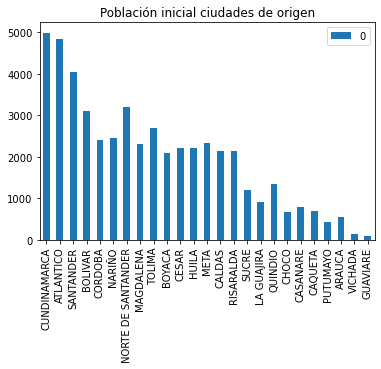

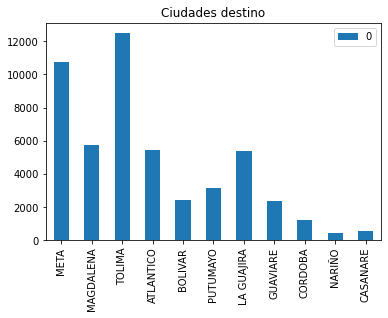

In [32]:
#histogramas para ver la distribución de población 

#origen
ciudades_o=[]
for i in range(len(personas)):
    po=personas[i].origin.name
    ciudades_o.append(po)
letter_counts_o = Counter(ciudades_o)
df_ciudades_o = pd.DataFrame.from_dict(letter_counts_o, orient='index')
df_ciudades_o.plot(kind='bar',title='Población inicial ciudades de origen')

#destino
ciudades_d=[]
for j in range(len(personas)):
    p_d=personas[j].destination.name
    ciudades_d.append(p_d)
letter_counts_d = Counter(ciudades_d)
df_ciudades_d = pd.DataFrame.from_dict(letter_counts_d, orient='index')
df_ciudades_d.plot(kind='bar',title='Ciudades destino')

In [26]:
tablaf.loc[city]
bla=[x for x in cities if x.name== city][0]
bla.namecity='CALDAS'
n_ciudad_destino=tablaf.loc[city][tablaf.loc[city]==16.2].index.values[0].split('s ')[1] 
n_ciudad_destino
# ordenar aleatoriamente un array de objetos
personas_def= personas.copy()
np.random.shuffle(personas_def)
print(personas[34].origin.name)
print(personas_def[34].origin.name)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [33]:
treated=[]

depP ='ATLANTICO'
popP = arch2.set_index('Departamento').loc[depP].people_count_round
cPOr = City(depP, popP)
cPOr.machine = Machine()
tablaf_loc = tablasCorr(depP)
time_d = min(tablaf_loc )

cPDes = tablaf_loc[tablaf_loc==time_d].index.values[0].split('s ')[1]
popDes = arch2.set_index('Departamento').loc[cPDes].people_count_round
city_des = City(cPDes, popDes)
city_des.machine = Machine()

person = Person(depP,cPDes,time_d)
LIMIT=10
print(city_des.name)
#si la cola no está llena
#if len(city_des.machine.treated) < LIMIT:
#    person.status = TREATED
#    city_des.machine.treated.append(person)
#    treated.append(person)

# Si la cola está llena 
city_des.machine.treated=np.ones(10)
    
if len(city_des.machine.treated) == LIMIT:
    city_des.machine.status = OCCUPIED
    new_ori=city_des.name
    person.origin = new_ori
    tablaf_loc2 = tablasCorr(new_ori) 
    t_d=min(tablaf_loc2)
    n_city_des=tablaf_loc2[tablaf_loc2==t_d].index.values[0].split('s ')[1]    
n_city_des


ATLANTICO
MAGDALENA
MAGDALENA


'ATLANTICO'

In [51]:

def tablasCorr(ciudad):
    newTabla2=[]
    t_d=min(tablaf.loc[ciudad])
    if t_d<0.1:
        newTabla=tablaf.loc[ciudad]
        newTabla2=newTabla.drop(labels=['Hours '+ciudad])
        print('hola')
    else:
        newTabla2=tablaf.loc[ciudad]
    return newTabla2
tablasCorr('CHOCO')

Hours ATLANTICO    19.396111
Hours BOLIVAR      18.234444
Hours NARIÑO       16.423889
Hours MAGDALENA    21.189444
Hours BOYACA       14.834167
Hours CALDAS        6.754444
Hours QUINDIO       6.703333
Hours CASANARE     19.516667
Hours CAQUETA      16.602500
Hours ARAUCA       25.623889
Hours VICHADA      31.510278
Name: CHOCO, dtype: float64

In [180]:
dfCities
dfCities['Capacidad Normalizada'].sum()
for city in cities:
    print(city.name)
    print(city.machine)
    print('-----')

CUNDINAMARCA
None
-----
ATLANTICO
-----
SANTANDER
None
-----
BOLIVAR
None
-----
CORDOBA
-----
NARIÑO
None
-----
NORTE DE SANTANDER
None
-----
MAGDALENA
None
-----
TOLIMA
None
-----
BOYACA
None
-----
CESAR
None
-----
HUILA
None
-----
META
None
-----
CALDAS
None
-----
RISARALDA
-----
SUCRE
None
-----
LA GUAJIRA
-----
QUINDIO
None
-----
CHOCO
None
-----
CASANARE
None
-----
CAQUETA
-----
PUTUMAYO
None
-----
ARAUCA
None
-----
VICHADA
None
-----
GUAVIARE
None
-----


In [143]:
arch2

,Departamento,population_mm,population_ratio,latitud,longitud,Hours ANTIOQUIA,Distance ANTIOQUIA,Hours ARAUCA,Distance ARAUCA,Hours ATLANTICO,...,TAE linfoma no Hodgkin. hombres,TAE pulmón. mujeres,TAE melanoma. hombres,TAE cáncer colorrectal. mujeres,TAE linfoma no Hodgkin. mujeres,TAE linfoma Hodgkin. hombres,TAE linfoma Hodgkin. mujeres,TAE melanoma. mujeres,net,people_count
0,ANTIOQUIA,6.400,0.136893,6.25184,-75.56359,0.000000,0.000,20.755000,838.362,13.131389,...,8.0,12.7,4.5,13.5,5.3,1.2,0.6,3.4,209.1,2862.422998
1,ARAUCA,0.260,0.005561,7.08471,-70.75908,20.379444,837.602,0.000000,0.000,18.852778,...,4.7,4.0,2.4,8.4,3.8,0.8,1.6,0.8,208.8,116.119097
2,ATLANTICO,2.530,0.054115,10.96854,-74.78132,13.334722,698.869,18.233611,948.746,0.000000,...,7.4,6.1,0.9,11.9,4.8,1.1,0.5,0.5,190.7,1031.979381
3,BOLIVAR,2.070,0.044276,10.39972,-75.51444,12.165000,638.301,19.801111,1001.901,2.445556,...,5.5,4.4,0.3,8.1,3.5,0.8,0.6,0.8,150.3,665.470996
4,BOYACA,1.220,0.026095,5.53528,-73.36778,9.843611,432.817,11.897222,477.881,15.518611,...,5.5,3.4,2.6,10.4,5.1,1.3,0.5,4.1,171.4,447.270705
5,CALDAS,0.990,0.021176,5.06889,-75.51738,4.834722,195.747,20.340556,977.953,16.913056,...,9.5,7.7,3.5,16.2,5.8,1.6,0.3,2.5,215.3,455.909908
6,CAQUETA,0.400,0.008556,1.61438,-75.60623,14.368889,814.957,23.339722,1228.719,22.378611,...,6.8,4.6,3.8,8.7,3.7,1.7,0.0,0.7,172.6,147.672827
7,CASANARE,0.420,0.008984,5.33775,-72.39586,15.284444,722.564,6.214444,367.038,21.184167,...,4.8,3.0,2.8,8.5,4.7,0.0,0.0,3.8,184.7,165.926591
8,CESAR,1.200,0.025667,10.46314,-73.25322,12.708333,754.718,15.866944,818.414,4.922778,...,4.8,8.8,1.5,8.7,3.8,0.5,0.6,0.6,184.2,472.792608
9,CHOCO,0.530,0.011336,5.69188,-76.65835,6.529167,239.710,25.623889,1241.269,19.396111,...,3.4,3.6,0.7,5.5,2.0,0.4,0.0,1.8,124.4,141.024983
